<a href="https://colab.research.google.com/github/TejasGode/COVID-19-Prediction-using-LSTM-RNN/blob/master/TimeSeriesLSTM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.preprocessing.sequence import TimeseriesGenerator


data = pd.read_csv("/content/drive/My Drive/case_time_series_mod_dates.csv")
print(data.info())


dates= data['Date']
d  = pd.to_datetime(data['Date'])
#print('d',d)

data.set_axis(data['Date'], inplace= True)

last_dates = dates.values[-1]
print('last dates: ',dates.values[-1])
conf_data = data['Total Confirmed'].values
print(conf_data.shape)

Using TensorFlow backend.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             110 non-null    object
 1   Daily Confirmed  110 non-null    int64 
 2   Total Confirmed  110 non-null    int64 
 3   Daily Recovered  110 non-null    int64 
 4   Total Recovered  110 non-null    int64 
 5   Daily Deceased   110 non-null    int64 
 6   Total Deceased   110 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 6.1+ KB
None
last dates:  18-May-20
(110,)


In [0]:
import plotly
import plotly.graph_objects as go

series = pd.read_csv("/content/drive/My Drive/covid_19_india.csv")

trace1 = go.Scatter(
    x = dates,
    y = conf_data,
    mode='lines',
    name = 'Ground Truth'    
)

layout = go.Layout(
    title = "Covid-19 Confirmed Cases (India)",
    xaxis= {'title': 'Date'},
    yaxis = { 'title' : 'Cases'}

)

fig = go.Figure(data=[trace1], layout= layout)
fig.show()


In [0]:
conf_data = data['Total Confirmed'].values

#print(conf_data)
#print(conf_data.shape)

conf_data = conf_data.reshape((-1,1))
#print(conf_data)

split_perecent = 0.67
split = int(split_perecent *len(conf_data) )

conf_train = conf_data[:split]
dates_train = dates[:split]

conf_test = conf_data[split:]
dates_test = dates[split:]

In [0]:
look_back = 5

train_generator = TimeseriesGenerator(conf_train, conf_train, length = look_back, sampling_rate=1, stride=1, batch_size=4)
test_generator = TimeseriesGenerator(conf_test, conf_test, length = look_back,  sampling_rate=1, stride=1, batch_size=1)

In [0]:
X = np.array([1,2,34,6,67,787,8,90])
print(np.shape(X))

X = np.reshape(X,(1, 1, len(X)))
print(X)

(8,)
[[[  1   2  34   6  67 787   8  90]]]


In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model = Sequential()
model.add(
    LSTM(22,
        activation='relu', return_sequences=True, input_shape=(look_back,1)))

model.add(LSTM(22, activation='relu'))

model.add(Dense(1))

model.compile(optimizer ='adam', loss='mean_squared_error', metrics=['accuracy'])

num_epochs= 30
model.fit_generator(train_generator, epochs= num_epochs, verbose=1)

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

model.save('covid_19_17th.h5')
model_file = drive.CreateFile({'title' : 'models.h5'})                       
model_file.SetContentFile('covid_19_17th.h5')                       
model_file.Upload()

Epoch 1/30
17/17 [==============================] - 1s 63ms/step - loss: 4893530.2669 - accuracy: 0.0000e+00
Epoch 2/30
17/17 [==============================] - 1s 33ms/step - loss: 4858157.1111 - accuracy: 0.0000e+00
Epoch 3/30
17/17 [==============================] - 1s 32ms/step - loss: 4831042.1521 - accuracy: 0.0000e+00
Epoch 4/30
17/17 [==============================] - 1s 35ms/step - loss: 4800121.7973 - accuracy: 0.0000e+00
Epoch 5/30
17/17 [==============================] - 1s 31ms/step - loss: 4034207.3696 - accuracy: 0.0000e+00
Epoch 6/30
17/17 [==============================] - 1s 31ms/step - loss: 3337237.9512 - accuracy: 0.0000e+00
Epoch 7/30
17/17 [==============================] - 1s 32ms/step - loss: 2795732.9032 - accuracy: 0.2353
Epoch 8/30
17/17 [==============================] - 1s 34ms/step - loss: 241665.8434 - accuracy: 0.0147
Epoch 9/30
17/17 [==============================] - 1s 33ms/step - loss: 481583.2524 - accuracy: 0.0294
Epoch 10/30
17/17 [==============

In [0]:
'''

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Bidirectional
import matplotlib.pyplot as plt
from pandas import DataFrame

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

train = DataFrame()
val = DataFrame()

for i in range(5):
    model = Sequential()
    model.add(
        LSTM(10,
            activation= 'relu',
            return_sequences=True,
            input_shape=(look_back,1))
    )

    model.add(LSTM(10, activation='elu'))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss='mean_squared_error')

    num_epochs= 30
    history= model.fit_generator(train_generator, epochs= num_epochs, verbose=1)

    # story history
    train[str(i)] = history.history['loss']
    #val[str(i)] = history.history['val_loss']


# plot train and validation loss across multiple runs
plt.plot(train, color='blue', label='train')
#pyplot.plot(val, color='orange', label='validation')
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


model.save('covid_19_12th.h5')
model_file = drive.CreateFile({'title' : 'models.h5'})                       
model_file.SetContentFile('models.h5')                       
model_file.Upload()

'''

  
# covid_19_13_1th_1.h5  --->  /content/covid_19_13_1th_1.h5 ==> 
# covid_19_15_1th_1.h5    --> trained on 22 units, 2 layer, 30 epochs    --- best
# # covid_19_16_1th_1.h5    --> trained on 22 units, 2 layer, 100 epochs
# covid_19_17_1th_1.h5    --> trained on 22 units, 3 layer, 30 epochs
# covid_19_18_1th_1.h5    --> trained on 22 units, 2 layer, 30 epochs
# covid_19_19_1th_1.h5    --> trained on 22 units, 1 layer, 30 epochs

Epoch 1/30
23/23 [==============================] - 1s 60ms/step - loss: 5638120.6674
Epoch 2/30
23/23 [==============================] - 1s 32ms/step - loss: 5668830.2161
Epoch 3/30
23/23 [==============================] - 1s 39ms/step - loss: 5585763.7130
Epoch 4/30
23/23 [==============================] - 1s 43ms/step - loss: 5584773.9780
Epoch 5/30
23/23 [==============================] - 1s 35ms/step - loss: 5583957.0408
Epoch 6/30
23/23 [==============================] - 1s 32ms/step - loss: 5583178.2544
Epoch 7/30
23/23 [==============================] - 1s 36ms/step - loss: 5582406.0620
Epoch 8/30
23/23 [==============================] - 1s 32ms/step - loss: 5580387.8840
Epoch 9/30
23/23 [==============================] - 1s 32ms/step - loss: 5577352.8977
Epoch 10/30
23/23 [==============================] - 1s 32ms/step - loss: 2257443.0024
Epoch 11/30
23/23 [==============================] - 1s 34ms/step - loss: 1794219.0503
Epoch 12/30
23/23 [==============================] -

KeyboardInterrupt: ignored

In [0]:
from keras.models import load_model

model = load_model('/content/covid_19_16th.h5')

# covid_19_2nd_go_back.h5 -- go back    /content/covid_19_2nd_go_back.h5
# covid_19_1st -- trained on total confirmed data  /content/drive/My Drive/covid_19_1st.h5

# covid_19_3rd.h5   -- trained on batch =3, look_back =5                  /content/covid_19_3rd.h5
# covid_19_4th.h5    --  trained on batch =3, look_back =5, sampling_rate=1, stride=1           /content/covid_19_4th.h5
# covid_19_5th.h5  --  trains on 2 lr, return sequences =True     /content/covid_19_5th.h5
#  covid_19_6th.h5  -- 30 epochs
#  covid_19_7th.h5 -- 50 epochs                       /content/covid_19_7th.h5
#   covid_19_8th.h5     --- 75                         /content/covid_19_8th.h5
#   covid_19_9th.h5     --- 30             return_sequences= True, input_shape=(look_back, 1), stateful=True
#   covid_19_9th.h5     --- 30 _2 layers --'elu'  
#   covid_19_12th.h5      --- 30  _2 layers -- go_back, return_sequences=True
#   covid_19_12th (1).h5   ---100 eochs    1 layer                     /content/covid_19_12th.h5
#   covid_19_13th.h5     --- 100 epochs, 2 layer
#  covid_19_14th.h5     --- --- 100 epochs, 1 layer, batch_size=7
#   covid_19_16th.h5   ---    units=22 | 1 layer  /content/covid_19_16th.h5
#   covid_19_17th.h5    ---    units=22 - 2 layer batch =3         /content/covid_19_17th.h5

In [0]:
import plotly.graph_objects as go

prediction = model.predict_generator(test_generator)    # predict on validation data

#  np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

conf_train = conf_train.reshape((-1))     # (-1) converts (3*4) to 12 [1,2,3,4,5,...]
#(-1,1) converts ([[1,2,3,4]]) to ([[1],
                     #              [2]...])
conf_test = conf_test.reshape((-1))
prediction = prediction.reshape((-1))
print('prediction: ', prediction)

trace1 = go.Scatter(
    x= dates_train,
    y = conf_train,
    mode = 'lines',
    name = "Training Data" 
)

trace2 = go.Scatter(
    x= dates_test,
    y= prediction,
    mode = 'lines',
    name = "Predictions"
)

trace3 = go.Scatter(
    x = dates_test,
    y = conf_test,
    mode='lines',
    name = 'Ground Truth'    
)

layout = go.Layout(
    title = "Google Stock",
    xaxis= {'title': 'Date'},
    yaxis = { 'title' : 'Close'}
)

fig= go.Figure(data=[trace1, trace2, trace3], layout= layout)

#fig = go.Figure(data=[trace1, trace2, trace3], layout= layout)
fig.show()

prediction:  [ 16831.371  18406.307  19991.312  21793.688  23451.174  25403.863
  27636.04   29928.148  32116.828  34482.055  36840.96   39395.062
  41925.99   42763.78   45300.227  47961.39   50858.34   53792.918
  60012.32   64319.305  69024.19   74132.055  79516.07   84663.59
  86347.     91541.05   96867.484 102403.65  108337.37  113898.05
 119629.16  125681.9  ]


prediction:  [ 16831.371  18406.307  19991.312  21793.688  23451.174  25403.863
  27636.04   29928.148  32116.828  34482.055  36840.96   39395.062
  41925.99   42763.78   45300.227  47961.39   50858.34   53792.918
  60012.32   64319.305  69024.19   74132.055  79516.07   84663.59
  86347.     91541.05   96867.484 102403.65  108337.37  113898.05
 119629.16  125681.9  ]


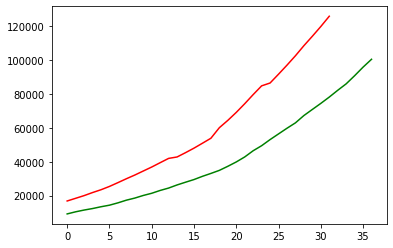

In [0]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

conf_train = conf_train.reshape((-1))     # (-1) converts (3*4) to 12 [1,2,3,4,5,...]
#(-1,1) converts ([[1,2,3,4]]) to ([[1],
                     #              [2]...])
conf_test = conf_test.reshape((-1))
prediction = prediction.reshape((-1))
print('prediction: ', prediction)


plt.plot(prediction, 'r')
plt.plot(conf_test, 'g')    # conf_test # ground truth
plt.show()


trace2 = go.Scatter(
    x= dates_test,
    y= prediction,
    mode = 'lines',
    name = "Predictions"
)

layout = go.Layout(
    title = "Google Stock",
    xaxis= {'title': 'Date'},
    yaxis = { 'title' : 'Close'}
)

fig = go.Figure(data=[ trace2], layout= layout)
fig.show()



In [0]:
# Forcast
conf_data = data['Total Confirmed'].values
conf_data = conf_data.reshape((-1))
look_back = 5

def predict(num_prediction, model):   # num_prediction = no. of days, a==> where model is stored at a
    prediction_list = conf_data[-look_back:]
    #print(prediction_list)

    for _ in range(num_prediction):     #  underscore(_) as a variable in looping.
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back,1))
        #print(x.type)
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)

    prediction_list =  prediction_list[look_back-1:]

    return prediction_list
  
def predict_dates(num_prediction):
    last_date =  last_dates #data['Dates'].values[-1]   #last date = 
    #           data['Date']
    print('last date', last_date)
    prediction_dates = pd.date_range(last_date, periods= num_prediction +1).tolist() 
    print(prediction_dates)
    return prediction_dates

num_prediction = 12
forcast = predict(num_prediction, model)
forcast_dates = predict_dates(num_prediction)

last date 18-May-20
[Timestamp('2020-05-18 00:00:00', freq='D'), Timestamp('2020-05-19 00:00:00', freq='D'), Timestamp('2020-05-20 00:00:00', freq='D'), Timestamp('2020-05-21 00:00:00', freq='D'), Timestamp('2020-05-22 00:00:00', freq='D'), Timestamp('2020-05-23 00:00:00', freq='D'), Timestamp('2020-05-24 00:00:00', freq='D'), Timestamp('2020-05-25 00:00:00', freq='D'), Timestamp('2020-05-26 00:00:00', freq='D'), Timestamp('2020-05-27 00:00:00', freq='D'), Timestamp('2020-05-28 00:00:00', freq='D'), Timestamp('2020-05-29 00:00:00', freq='D'), Timestamp('2020-05-30 00:00:00', freq='D')]


In [0]:
import plotly.graph_objects as go

trace1 = go.Scatter(
    x = forcast_dates,
    y = forcast,
    mode = 'lines',
    name = 'Prediction'    
)

layout = go.Layout(
    title = "Covid-19 Confirmed Cases",
    xaxis= {'title': 'Date'},
    yaxis = { 'title' : 'Cases'}

)

#fig = px.line(trace1, x= 'forcast_dates', y = 'forcast', title= 'Confirmed')

fig = go.Figure(data=trace1, layout= layout)

fig.show()


In [0]:
import plotly.graph_objects as go
fig = go.Figure( go.Scatter(x=[1,2,3], y=[1,3,2] ) )
fig.show()

In [0]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'colab' Renderer"
)
fig.show(renderer="colab")